In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [14]:
from pathlib import Path

root_dir = str(Path.cwd().parent.parent)

In [30]:
def print_spectrum(file_name, size=24, angle_up=30, angle_side=45):
    data = pd.read_csv(root_dir + "/data/music_spectrum_data/" + file_name, index_col=0, dtype=np.double)
    data.columns = pd.to_numeric(data.columns)
    data = data.loc[:,:]
    x = data.index.to_numpy()
    y = data.columns.to_numpy()
    z = data.values
    X, Y = np.meshgrid(x,y)
    Z = z.transpose()

    fig = plt.figure(figsize=(size, size))
    ax = plt.axes(projection='3d')
    ax.view_init(angle_up, angle_side)
    surf = ax.plot_surface(X, Y, Z, cmap='turbo', linewidth=0, rcount=150, ccount=300, alpha=1)
    ax.set_xlabel("azimuth")
    ax.set_ylabel("elevation")
    ax.set_zlabel("result")
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=30)
    plt.show()

In [24]:
def print_spectrum(file_name, size=24, angle_up=30, angle_side=45):
    data = pd.read_csv(root_dir + "/data/music_spectrum_data/" + file_name, index_col=0, dtype=np.double)
    data.columns = pd.to_numeric(data.columns)
    data1 = data.loc[:np.pi, 0:]
    x = data1.index.to_numpy()
    y = data1.columns.to_numpy()
    z = data1.values
    X, Y = np.meshgrid(x,y)
    Z = z.transpose()

    fig = plt.figure(figsize=(size, size))
    ax = plt.axes(projection='3d')
    ax.view_init(angle_up, angle_side)
    surf = ax.plot_surface(X, Y, Z, cmap='turbo', linewidth=0, rcount=150, ccount=300, alpha=1)
    ax.set_xlabel("azimuth")
    ax.set_ylabel("elevation")
    ax.set_zlabel("result")
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=30)
    plt.show()
    
    data2 = data.loc[np.pi:, :0]
    x = data1.index.to_numpy()
    y = data1.columns.to_numpy()
    z = data1.values
    X, Y = np.meshgrid(x,y)
    Z = z.transpose()

    fig = plt.figure(figsize=(size, size))
    ax = plt.axes(projection='3d')
    ax.view_init(angle_up, angle_side)
    surf = ax.plot_surface(X, Y, Z, cmap='turbo', linewidth=0, rcount=150, ccount=300, alpha=1)
    ax.set_xlabel("azimuth")
    ax.set_ylabel("elevation")
    ax.set_zlabel("result")
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=30)
    plt.show()

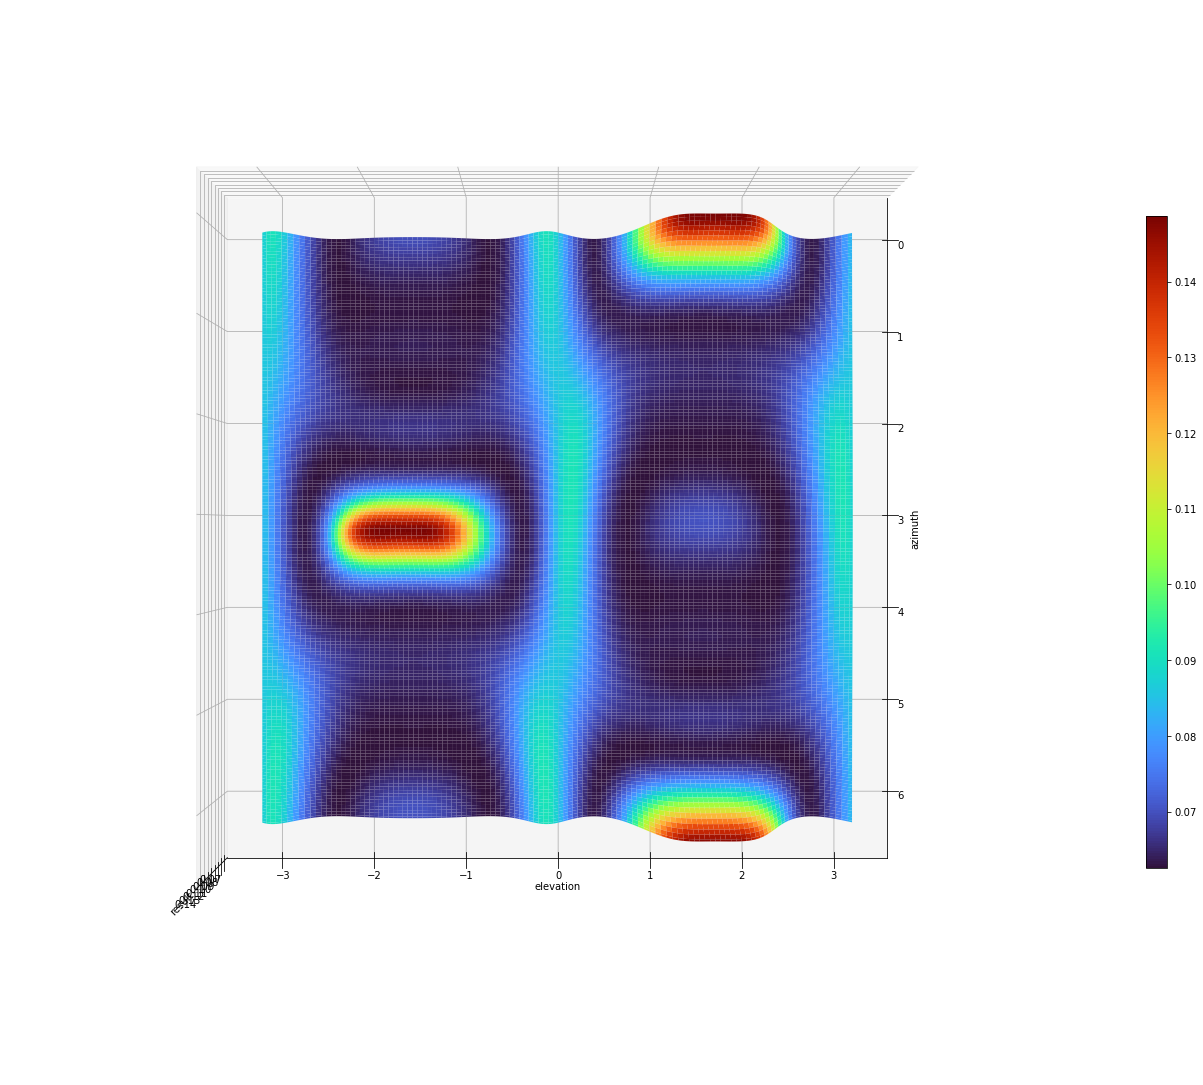

In [34]:
print_spectrum("close_sample_0000.csv", angle_up=90, angle_side=0)
# print_spectrum("close_sample_0029.csv")
# print_spectrum("close_sample_0300.csv")
# print_spectrum("close_sample_0900.csv", angle_up=10, angle_side=0)
# print_spectrum("close_sample_1500.csv")
# print_spectrum("close_sample_2700.csv")